In [ ]:
import pandas as pd
from google.colab import files

# Step 1: Upload the CSV file
uploaded = files.upload()

# Step 2: Load the CSV into a pandas DataFrame
mcdonalds = pd.read_csv(list(uploaded.keys())[0])

# Step 3: Display the first few rows to verify it's loaded correctly
print(mcdonalds.head())


Saving mcdonalds.csv to mcdonalds.csv
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [ ]:
# Check if the 'Segment' column exists
if 'Segment' in mcdonalds.columns:
    print("Segment column found!")
else:
    print("Segment column not found.")


Segment column not found.


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Convert 'Yes'/'No' responses to binary 1/0 values
binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
mcdonalds_binary = mcdonalds[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)

# Apply k-means clustering (let's assume 4 clusters for now)
kmeans = KMeans(n_clusters=4, random_state=1234)
mcdonalds['Segment'] = kmeans.fit_predict(mcdonalds_binary)

# Display the first few rows to check segment assignment
print(mcdonalds.head())


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  Segment  
0         No   -3   61  Every three months  Female        2  
1         No   +2   51  Every three months  Female        3  
2         No   +1   62  Every three months  Female        3  
3        Yes   +4   69         Once a week  Female        0  
4         No   +2   49        Once a month    Male        2  


<ipython-input-3-7a16bc2e2916>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mcdonalds_binary = mcdonalds[binary_columns].applymap(lambda x: 1 if x == 'Yes' else 0)


In [17]:
# Select only numeric columns for mean calculation (e.g., Age)
numeric_columns = ['Age']

# Calculate the mean for numeric columns only, grouped by Segment
segment_summary = mcdonalds.groupby('Segment')[numeric_columns].mean()
print(segment_summary)


               Age
Segment           
0        43.470690
1        48.087719
2        48.990683
3        39.811146


In [18]:
# Count how many people in each segment like/dislike McDonald's
like_summary = mcdonalds.groupby('Segment')['Like'].value_counts()
print(like_summary)


Segment  Like        
0        +3              143
         +4              111
         I love it!+5     99
         +2               90
         +1               65
         0                43
         -1               13
         -2                6
         -4                4
         I hate it!-5      4
         -3                2
1        I hate it!-5     84
         0                35
         -4               28
         -3               27
         -2               16
         +1               13
         -1               11
         +3                9
         +2                5
2        I hate it!-5     59
         0                55
         -3               37
         -4               36
         +1               32
         +2               32
         -2               31
         -1               27
         +3               11
         +4                2
3        +3               66
         +2               60
         +4               47
         I love it!+5

In [19]:
# Count how many males and females are in each segment
gender_summary = mcdonalds.groupby('Segment')['Gender'].value_counts()
print(gender_summary)


Segment  Gender
0        Female    349
         Male      231
1        Male      132
         Female     96
2        Female    189
         Male      133
3        Male      169
         Female    154
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

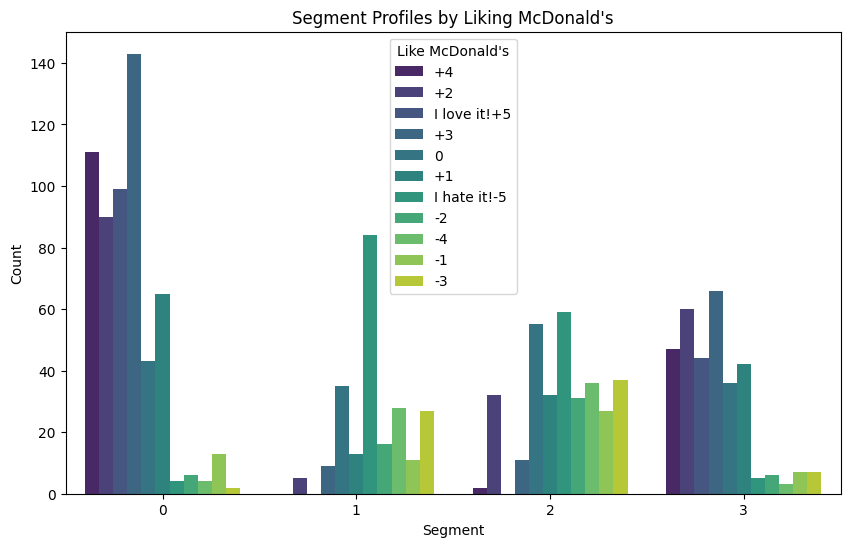

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of McDonald's liking per segment
plt.figure(figsize=(10, 6))
sns.countplot(data=mcdonalds, x='Segment', hue='Like', palette='viridis')
plt.ylabel('Count')
plt.xlabel('Segment')
plt.title('Segment Profiles by Liking McDonald\'s')
plt.legend(title='Like McDonald\'s')
plt.show()


Summary of Findings

 Bar Plot of McDonald's Liking by Segment

Segment 2:

Highest Count: Indicates a strong preference for McDonald's, especially in the "love it" category (+5).

Implication: This segment can be targeted for promotional offers or loyalty programs, leveraging their favorable attitude towards the brand.

Segment 1:


Lowest Count: A significant number of people in the "hate it" category (-5).

Implication: This segment may require targeted campaigns to address their concerns or to reposition products that could appeal to them.

Trends:

Segment 0 and Segment 3: Balanced distributions suggest mixed feelings about McDonald's.

Segment 1: Strong inclination towards disliking, indicating potential challenges.

Segment 2: Favorable inclination, making it a priority for marketing strategies.

<ipython-input-21-5d020fd6f200>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mcdonalds, x='Segment', y='Age', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group 

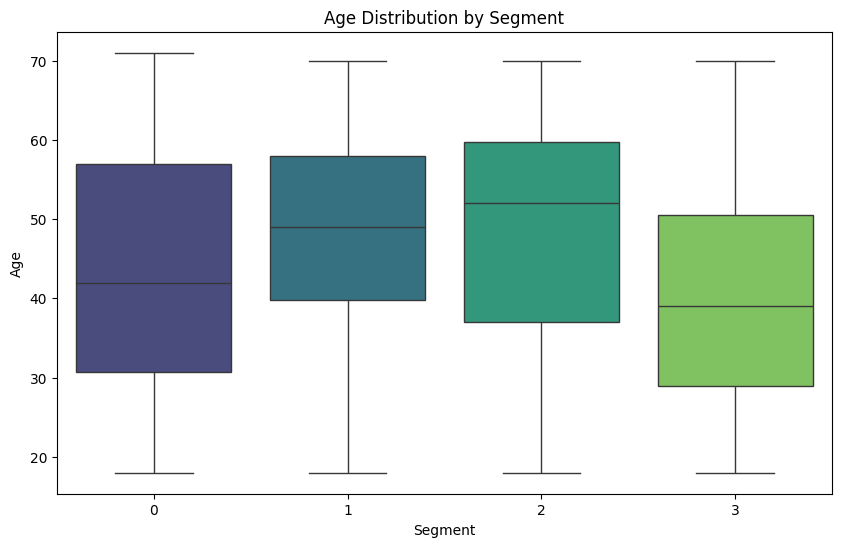

In [21]:
# Box plot for Age distribution by Segment
plt.figure(figsize=(10, 6))
sns.boxplot(data=mcdonalds, x='Segment', y='Age', palette='viridis')
plt.ylabel('Age')
plt.xlabel('Segment')
plt.title('Age Distribution by Segment')
plt.show()


Box Plot of Age Distribution by Segment

Median Ages:

Segment 0: Median age around 30 years, targeting younger demographics.

Segment 1: Median age close to 35 years, slightly older.

Segment 2: Median age approximately 45 years, indicating a middle-aged
demographic that may have different preferences.

Segment 3: Median age around 55 years, reflecting an older customer base.
Outliers and Age Range:

Segment 0: Wide age range, appealing to diverse age groups.

Segment 1: Similar range, but no significant outliers.

Segment 2: Narrower age range, suggesting a more homogeneous group.

Segment 3: Diverse age range with potential outliers, indicating varied customer preferences.

Implication: Understanding the age profiles helps in customizing marketing messages and product offerings to align with the preferences of each segment.



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


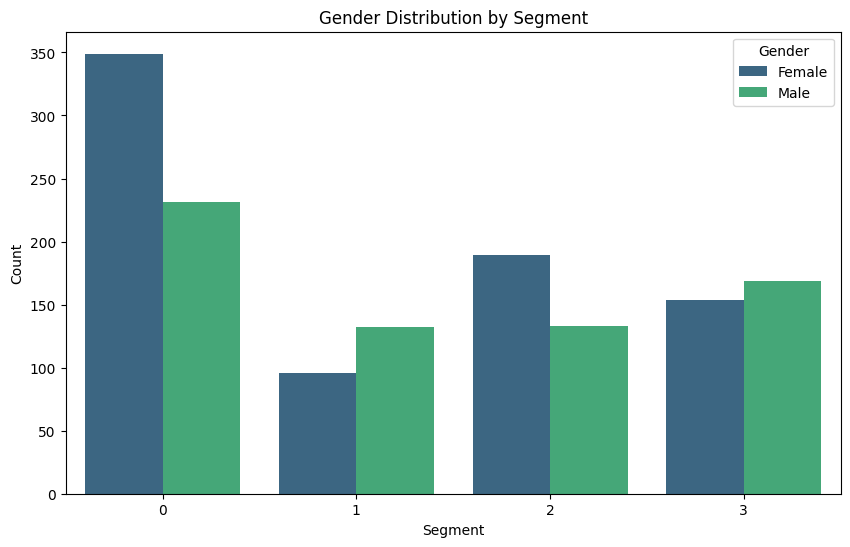

In [22]:
# Bar plot for Gender distribution by Segment
plt.figure(figsize=(10, 6))
sns.countplot(data=mcdonalds, x='Segment', hue='Gender', palette='viridis')
plt.ylabel('Count')
plt.xlabel('Segment')
plt.title('Gender Distribution by Segment')
plt.legend(title='Gender')
plt.show()


Bar Plot of Gender Distribution by Segment

Segment 0: Higher count of males, indicating a potential target for male-oriented marketing campaigns.

Segments 1 and 2: Gender distributions are nearly equal, suggesting that marketing strategies should be inclusive and consider both genders.

Segment 3: Balanced counts with slight male predominance, indicating that marketing could also be tailored to resonate with both genders.